<div style="background-color: lightgreen; padding: 18px;">
    <h1> Projeto| Estatística I
</div>

### Esse projeto visa a aplicação dos conceitos e ferramental da Estatística desenvolvidos nesse módulo

#### Para o desenvolvimento das atividades abaixo, o seu grupo pode escolher qualquer dataset que contenha uma coluna com valores inteiros.

In [7]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

__1) Em algum dataset, classifique as suas colunas em Quantitativa Discreta, Quantitiva Contínua, Qualitativa Ordinal ou Qualitativa Nominal.__


In [8]:
fiis = pd.read_csv('./fii.csv', sep=';')

fiis.head()

,Unnamed: 0,Codigo,Nome,Preco R$,VolumeMedio,DividendYield %,PatrimonioLiq R$,P/VP,Cotas,Segmento,Valorizacao12Meses
0,ABCP11,ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,"99,78",4.519,"0,44",910.000,"1,35",1.000.000,Shoppings,0.15
1,AEFI11,AEFI11,AESAPAR FDO INV IMOB - FII,"174,90",2.065,"0,71",110.000,"1,15",752.500,Outros,0.03
2,AGCX11,AGCX11,FDO INV IMOB AGÊNCIAS CAIXA - FII,"1.235,50",240.000,"0,69",430.000,"1,16",405.000,Outros,0.00
3,ALZR11,ALZR11,ALIANZA TRUST RENDA IMOBILIARIA FDO INV IMOB,"97,50",3.435,"0,69",97.000,"1,00",997.042,Outros,0.02
4,BBFI11B,BBFI11B,BB FDO INV IMOB PROGRESSIVO,"2.388,00",144.000,"1,04",400.000,"0,78",130.000,Lajes Corporativas,0.14


In [9]:

Dataset = pd.DataFrame(columns=fiis.columns)

for coluna in fiis.columns:
    tipo_dado = fiis[coluna].dtype
    unique_values = fiis[coluna].nunique()

    if tipo_dado in ['int64', 'float64']:
        if unique_values <= 10:
            Dataset.loc[0, coluna] = 'Quantitativa Discreta'
        else:
            Dataset.loc[0, coluna] = 'Quantitativa Contínua'
    else:
        if unique_values <= 10:
            Dataset.loc[0, coluna] = 'Qualitativa Nominal'
        else:
            Dataset.loc[0, coluna] = 'Qualitativa Ordinal'

Dataset

,Unnamed: 0,Codigo,Nome,Preco R$,VolumeMedio,DividendYield %,PatrimonioLiq R$,P/VP,Cotas,Segmento,Valorizacao12Meses
0,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Quantitativa Contínua,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Nominal,Quantitativa Contínua


__2) Com o mesmo dataset, construir a distribuição de probabilidade de uma feature com valores inteiros. Escrever uma função para calcular a Esperança e outra função para calcular a Variância dessa variável aleatória. Compare o resultado de sua função com os resultados de alguma nativa do Python (há muitos módulos/bibliotecas que calculam esses parâmetros). Calcule a Esperança e a Variância da variável aleatória da distribuição de probabilidade. Construa uma função que faça o papel da cdf() e outra função com o papel da sf(). Desafio extra: construir funções que fazem o papel da ppf() e da isf() .__'.f'.

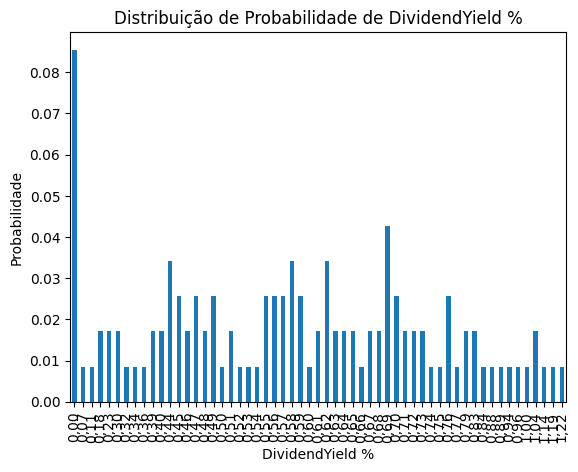

In [19]:

def distribuicao_probabilidade(coluna):
    valores = fiis[coluna].value_counts(normalize=True)
    valores = valores.sort_index()
    valores.plot(kind='bar')
    plt.xlabel(coluna)
    plt.ylabel('Probabilidade')
    plt.title('Distribuição de Probabilidade de ' + coluna)
    plt.show()

distribuicao_probabilidade('DividendYield %')

In [36]:
def esperanca(coluna):
    valores = fiis[coluna].value_counts(normalize=True)
    esperanca = 0
    for idx, val in valores.items():
        idx_numeric = float(idx.replace(',', '.'))  # Replace comma with period
        esperanca += idx_numeric * val
    return esperanca



print('à responsta da da função é: ', esperanca('DividendYield %'))

valores = fiis['DividendYield %'].str.replace(',', '.').astype(float)

esperanca = valores.mean()

print('a esperança é: ', esperanca)



à responsta da da função é:  0.5521367521367522
a esperança é:  0.5521367521367522


In [39]:
# Construa uma função que faça o papel da cdf() e outra função com o papel da sf()

def cdf(x, data):
    return (data <= x).mean()

def sf(x, data):
    return (data > x).mean()

print('o cdf de 1% é: ', cdf(1, valores))
print('o sf de 1% é: ', sf(1, valores))  

o cdf de 1% é:  0.9491525423728814
o sf de 1% é:  0.0423728813559322


 __3) Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__


__4) No exercício anterior, construir o intervalo de confiança para a média, com nível de confiança de 95% e erro percentual de 2% (para cima ou para baixo).__

__5) Se uma amostra de tamanho 30, vinda da variável aleatória do exercício 2), tiver uma média 10% maior que a média da população, a hipótese de que essas médias são iguais seria rejeitada ou não rejeitada, com um nível de confiança de 95%? (faça o teste de hipótese para responder essa pergunta. Utilize os desvio padrão populacional).__
